In [1]:
from arc_prize.model import ARCTransformerEncoderDecoderParams
from arc_prize.train import ARCModelState, ARCTrainParams
from arc_prize.vis import visualize_epochs
import modal
import torch
import petname




In [11]:


from arc_prize.train import train_on_mac


model_params = ARCTransformerEncoderDecoderParams(
  grid_dim=10,
  num_train_pairs=4,
  num_colors=10,
  num_encoder_layers=2,
  num_decoder_layers=2,
  num_heads=2,
  d_model=32,
  d_ff=32*4,
  dropout=0.3
)

train_params = ARCTrainParams(
  batch_size=16,
  learning_rate=1e-3,
  weight_decay=1e-4,
  dataset_dir=["/vol/data/flip", "/vol/data/move_many_random"]
)

num_epochs = 100

model_names = []

num_runs = 3

fn = modal.Function.lookup("arc-prize", "train")
for i in range(num_runs):
  model_name = petname.generate(words=3, separator='_')
  fn_call = fn.spawn(model_name, num_epochs, model_params, train_params)
  print("Model name", model_name, fn_call.object_id)
  model_names.append(model_name)

print(model_names)




Model name newly_civil_cod
fc-01J543FEFMVYATMNY3ATA5SE0H
['newly_civil_cod']


In [21]:
num_epochs = 100

model_names = ["newly_civil_cod"]

fn = modal.Function.lookup("arc-prize", "train")
for model_name in model_names:
  fn_call = fn.spawn(model_name, num_epochs, None, None)
  print("Model name", model_name, fn_call.object_id)
  


Model name newly_civil_cod fc-01J560HH2KV8YBBGRV7B06EDME


newly_civil_cod 251 EpochState(train_loss=0.16622621101140975, train_accuracy=0.9350349798202514, val_loss=0.19757824355736375, val_accuracy=0.9303499794006348, lr=1.953125e-06, weight_decay=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-08, grad_norm=0.6835315303879259, param_norm=76.20682602799641)


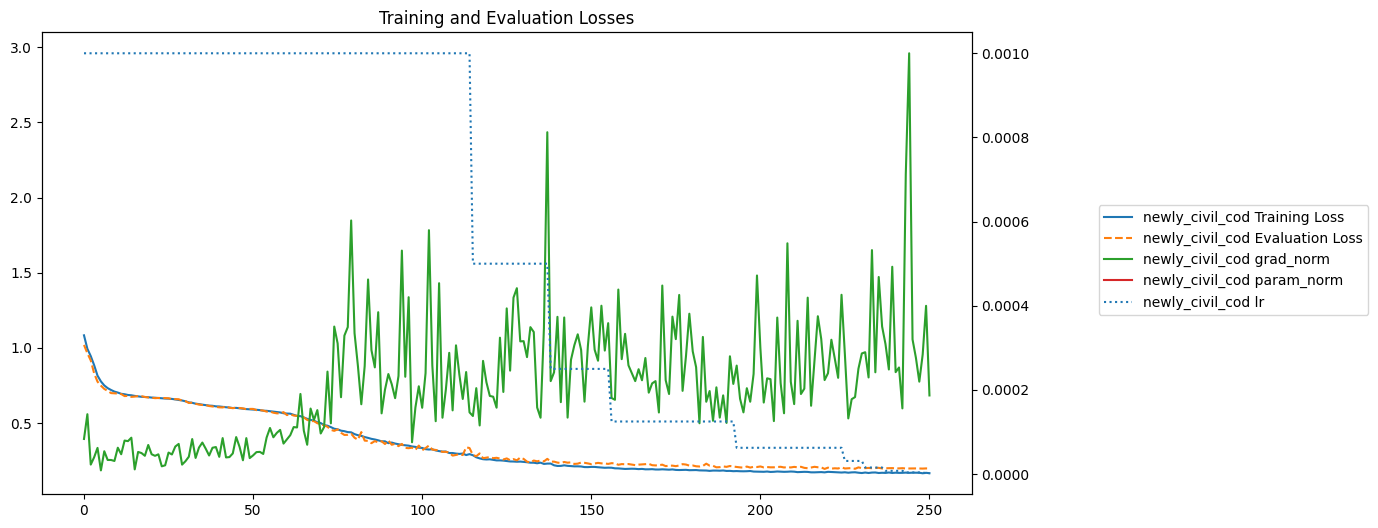

In [23]:
model_names = ['mainly_safe_moray', 'lovely_clear_chow', 'newly_civil_cod']

model_names = ["newly_civil_cod"]

epochs = {}


# checkpoint = None
get_model = modal.Function.lookup("arc-prize", "get_model")
for name in model_names:
  checkpoint = ARCModelState(**get_model.remote(name))
  # print(name, checkpoint.model_params)
  print(name, len(checkpoint.epochs), checkpoint.epochs[-1])
  epochs[name] = checkpoint.epochs

visualize_epochs(epochs)

In [ ]:
from arc_prize.vis import visualize_tensors


eval_model = modal.Function.lookup("arc-prize", "evaluate_model")
output = eval_model.remote("mainly_cool_gannet", "/vol/data/flip")
for item in output["output"]:
  visualize_tensors(torch.Tensor(item["grids"]).squeeze(0), torch.Tensor(item["output_grid"]).squeeze(0), torch.Tensor(item["predictions"]).squeeze(0))


In [ ]:
from arc_prize.vis import visualize_output_query, visualize_tensors


# model = ARCTransformer(d_model=d_model, num_heads=num_heads, num_layers=num_layers, d_ff=dim_feedforward, grid_dim=max_grid_size, num_colors=num_colors, num_train_pairs=max_context_pairs, dropout=dropout).to(device)

model_file_name = "models/model_75i3sirg.pth"
if model_file_name is not None:
    state_dict = torch.load(model_file_name, map_location=device)
    model.load_state_dict(state_dict)

model.eval()
eval_loader = DataLoader(val_dataset, batch_size=1, shuffle=True, collate_fn=collate_arc_fn, num_workers=0)
# batch = next(iter(eval_loader))

# visualize_output_query(model.output_query)


for i, batch in enumerate(eval_loader):
    grids, grid_masks, output_grid = [item.to(device) for item in batch]

    predictions = model.generate(grids, grid_masks)
    print(predictions.shape)

    visualize_tensors(grids.squeeze(0), output_grid.squeeze(0), predictions.squeeze(0))

